In [17]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
from numpy.fft import fftshift, fft2, fftfreq

In [ ]:
#chan_min=0
#chan_max=-1

#this_data1 = np.array([])
#this_time1 = np.array([])


#data_file = h5py.File('/data/fast0/veronica-scratch/us7000i9bw.h5','r')

#this_data = np.array(data_file['Acquisition/Raw[0]/RawData'][:,chan_min:chan_max])
#this_time = np.array(data_file['Acquisition/Raw[0]/RawDataTime'])

In [ ]:
#plt.imshow(np.transpose(this_data/np.max(this_data)),aspect="auto",cmap="seismic",vmin=-1,vmax=1)

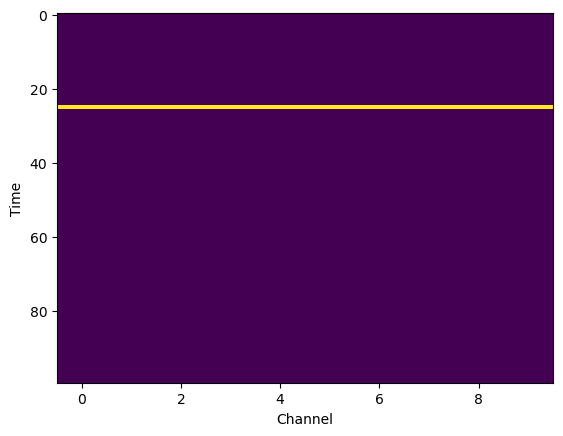

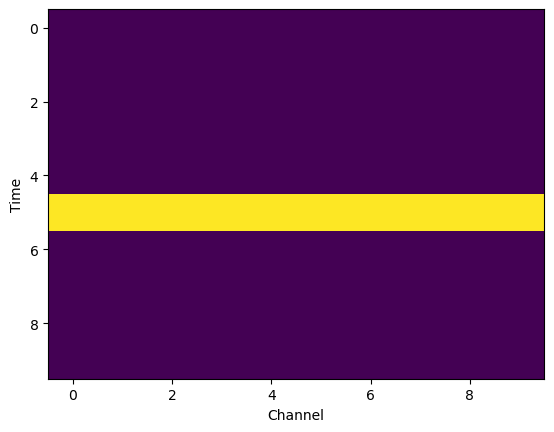

In [42]:
# set parameters for making synthetic data
num_channels = 10
num_data_samples = 100
num_template_samples = 10

# define synthetic data
data = np.zeros((num_data_samples,num_channels))
data[25,:] = 14

# visualize synthetic data
plt.imshow(data,aspect="auto")
plt.ylabel("Time")
plt.xlabel("Channel")
plt.show()

# define synthetic template
data_template = np.zeros((num_template_samples,num_channels))
data_template[5,:] = 12

# visualize synthetic template
plt.imshow(data_template,aspect="auto")
plt.ylabel("Time")
plt.xlabel("Channel")
plt.show()

In [166]:
def correlate_das(s1,s2,mode="channel"):

    # throw an error of input sizes are inconsistent
    if s1.shape != s2.shape:
        raise ValueError("s1 and s2 must have the same size!")
    
    # get fft size
    sz = s1.shape[0]
    n_bits = 1+int(np.log2(2*sz-1))
    fft_sz = 2**n_bits
    
    # take FFT along time axis for both
    fft_s1 = np.fft.fft(s1, fft_sz, axis=0)
    fft_s2 = np.fft.fft(s2, fft_sz, axis=0)
        
    # take complex conjugate of second signal 
    fft_s2_conj = np.conj(fft_s2)
      
    # multiply to get correlation function
    corr_fft = fft_s1*fft_s2_conj
    
    # take inverse fourier transform
    corr = np.fft.ifft(corr_fft, axis=0)
    
    # normalize (this is taken from tslearn, and it is confusing). "Overall" option gives a single correlation 
    # function that represents all channels; "channel" option returns a separate correlation function 
    # for each channel of input data
    if mode == "overall":
        norm1 = np.linalg.norm(s1)
        norm2 = np.linalg.norm(s2)
        norm_factor = norm1*norm2
        corr = np.vstack((corr[-(sz-1) :], corr[:sz]))
        norm_corr = np.real(corr).sum(axis=-1) / norm_factor
        
    if mode == "channel":
        norm1 = np.linalg.norm(s1,axis=0)
        norm2 = np.linalg.norm(s2,axis=0)
        norm_factor = norm1*norm2
        corr = np.vstack((corr[-(sz-1) :], corr[:sz]))
        norm_corr = np.real(corr) / norm_factor
    
    # throw an error if an invalid mode is requested
    if mode != "overall" and mode != "channel":
        raise ValueError("Valid modes are channel and overall.")

    return norm_corr


def template_match_das(template,data,xcorr_thresh):

    # define container
    all_corr = []

    # iterate through time windows
    for windowed_data in data:
    
        # pull out a time window of data
        # Define the start and end indices of the time window
        start_index = 20
        end_index = 30
        
        timewindow = data[start_index,end_index,:]
        
    
        # call cross correlation function
        corr = correlate_das(template,windowed_data)
        
        # get maximum value
        max_corr = np.max(np.abs(corr))
        
        
        # save value
        all_corr.append(max_corr)
        
        return all_corr
    

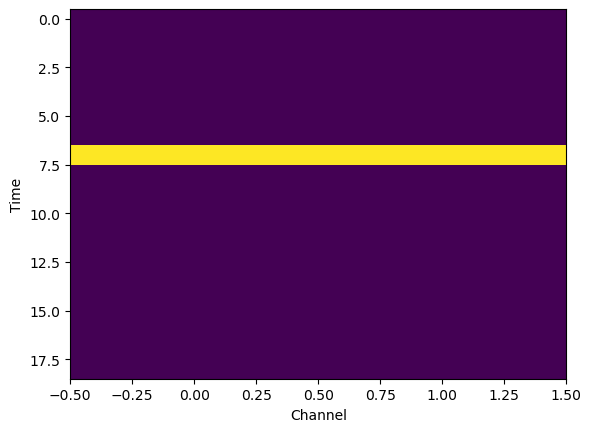

In [169]:
# test correlation function
corr = correlate_das(data[22:32,:2],data_template[:,:2],"channel")

# visualize correlation function
plt.imshow(corr,aspect="auto")
plt.ylabel("Time")
plt.xlabel("Channel")
plt.show()

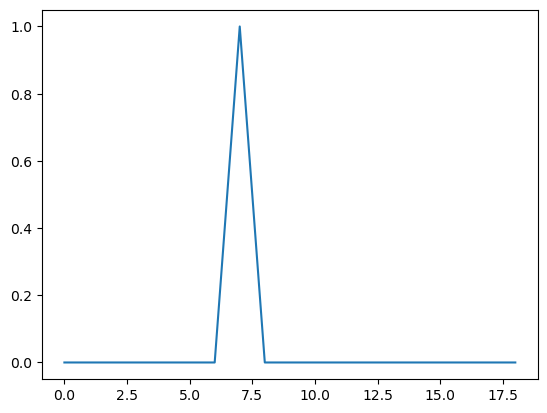

In [162]:
plt.plot(corr)

In [150]:
corr

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-9.10191787e-18, -9.10191787e-18],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-6.65446825e-17, -6.65446825e-17],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 5.28677631e-17,  5.28677631e-17],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])

In [114]:
data[22:32,:2]

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [14., 14.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])